# Week 3 Lab: Data Labeling & Annotation

**CS 203: Software Tools and Techniques for AI**  
**IIT Gandhinagar**

---

## Learning Objectives

By the end of this lab, you will be able to:

1. Set up and use Label Studio for annotation tasks
2. Create annotation interfaces for different data types
3. Write clear annotation guidelines
4. Calculate Inter-Annotator Agreement (IAA) metrics
5. Apply Cohen's Kappa and Fleiss' Kappa to measure label quality
6. Calculate IoU for spatial annotations

---

## Netflix Movie Theme

Continuing from Weeks 1-2, we'll label our cleaned movie reviews for sentiment analysis. This labeled data will be used for model training in later weeks.

---

## Part 1: Environment Setup

### 1.1 Install Required Packages

In [ ]:
# Install required packages
!pip install label-studio scikit-learn statsmodels pandas numpy matplotlib seaborn

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.0 MB/s eta 0:00:00


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import json

print("All imports successful!")

All imports successful!


---

## Part 2: Sample Data for Annotation

### 2.1 Create Movie Review Dataset

We'll create a set of movie reviews to annotate for sentiment.

In [ ]:
# Sample movie reviews for annotation
movie_reviews = [
    {"id": 1, "movie": "Inception", "Casts": "Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page", "review": "Mind-blowing! Nolan does it again with this masterpiece."},
    {"id": 2, "movie": "The Room", "Casts": "Tommy Wiseau, Juliette Danielle, Greg Sestero", "review": "So bad it's good. Hilarious unintentionally."},
    {"id": 3, "movie": "Parasite", "Casts": "Song Kang-ho, Lee Sun-kyun, Choi Woo-shik", "review": "Gripping from start to finish. Deserved every Oscar."},
    {"id": 4, "movie": "Cats", "Casts": "James Corden, Judi Dench, Ian McKellen", "review": "What did I just watch? Truly bizarre."},
    {"id": 5, "movie": "The Godfather", "Casts": "Marlon Brando, Al Paccino, James Caan", "review": "A timeless classic. Perfect in every way."},
    {"id": 6, "movie": "Avatar", "Casts": "Sam Worthington, Zoe Saldana, Sigourney Weaver", "review": "Visually stunning but the story is predictable."},
    {"id": 7, "movie": "The Dark Knight", "Casts": "Christian Bale, Heath Ledger, Aaron Eckhart", "review": "Heath Ledger's Joker is unforgettable."},
    {"id": 8, "movie": "Twilight",  "Casts": "Kristen Stewart, Robert Pattinson, Taylor Lautner", "review": "Not my cup of tea but I can see the appeal."},
    {"id": 9, "movie": "Interstellar", "Casts": "Matthew McConaughey, Anne Hathaway, Jessica Chastain", "review": "Made me cry. Beautiful exploration of love and time."},
    {"id": 10, "movie": "Emoji Movie", "Casts": "T.J. Miller, James Corden, Anna Faris", "review": "Just... no. Avoid at all costs."},
    {"id": 11, "movie": "Pulp Fiction", "Casts": "John Travolta, Samuel L. Jackson, Uma Thurman", "review": "Tarantino's dialogue is unmatched."},
    {"id": 12, "movie": "Sharknado",  "Casts": "Ian Ziering, Tara Reid, John Heard", "review": "Ridiculous premise but entertaining in a weird way."},
    {"id": 13, "movie": "The Shawshank Redemption", "Casts": "Tim Robbins, Morgan Freeman, Bob Gunton", "review": "Hope is a good thing. Best movie ever made."},
    {"id": 14, "movie": "Transformers 5", "Casts": "Mark Wahlberg, Anthony Hopkins, Isabela Moner", "review": "Explosions. That's it. That's the review."},
    {"id": 15, "movie": "La La Land", "Casts": "Ryan Gosling, Emma Stone, John Legend", "review": "Bittersweet ending that stays with you."},
    {"id": 16, "movie": "Batman v Superman",  "Casts": "Ben Affleck, Henry Cavill, Amy Adams", "review": "Had potential but ended up being a mess."},
    {"id": 17, "movie": "Spirited Away", "Casts": "Rumi Hiiragi, Miyu Irino, Mari Natsuki", "review": "Miyazaki's imagination knows no bounds."},
    {"id": 18, "movie": "The Last Airbender", "Casts": "Noah Ringer, Nicola Peltz, Jackson Rathbone", "review": "An insult to the animated series fans."},
    {"id": 19, "movie": "Coco", "Casts": "Anthony Gonzalez, Gael García Bernal, Benjamin Bratt", "review": "Pixar at its finest. Remember me..."},
    {"id": 20, "movie": "Justice League", "Casts": "Ben Affleck, Henry Cavill, Gal Gadot", "review": "Okay but nothing special. Just okay."},
]

df_reviews = pd.DataFrame(movie_reviews)
print(f"Created {len(df_reviews)} movie reviews for annotation")
df_reviews.head()

Created 20 movie reviews for annotation


,id,movie,Casts,review
0,1,Inception,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",Mind-blowing! Nolan does it again with this ma...
1,2,The Room,"Tommy Wiseau, Juliette Danielle, Greg Sestero",So bad it's good. Hilarious unintentionally.
2,3,Parasite,"Song Kang-ho, Lee Sun-kyun, Choi Woo-shik",Gripping from start to finish. Deserved every ...
3,4,Cats,"James Corden, Judi Dench, Ian McKellen",What did I just watch? Truly bizarre.
4,5,The Godfather,"Marlon Brando, Al Paccino, James Caan",A timeless classic. Perfect in every way.


### Question 2.1 (Solved): Export Data for Label Studio

Export the reviews in Label Studio's expected JSON format.

In [ ]:
# SOLVED: Export for Label Studio
def export_for_label_studio(df, text_column='review'):
    """
    Export DataFrame to Label Studio JSON format.

    Label Studio expects a list of objects with a 'data' field.
    """
    tasks = []
    for _, row in df.iterrows():
        task = {
            "data": {
                "id": int(row['id']),
                "movie": row['movie'],
                "text": row[text_column]
            }
        }
        tasks.append(task)
    return tasks

tasks = export_for_label_studio(df_reviews)

# Save to file
with open('movie_reviews_for_labeling.json', 'w') as f:
    json.dump(tasks, f, indent=2)

print("Exported to movie_reviews_for_labeling.json")
print("\nSample task:")
print(json.dumps(tasks[0], indent=2))

Exported to movie_reviews_for_labeling.json

Sample task:
{
  "data": {
    "id": 1,
    "movie": "Inception",
    "text": "Mind-blowing! Nolan does it again with this masterpiece."
  }
}


### Question 2.2: Add More Fields for Export

Modify the export function to also include the movie title in the Label Studio interface.

In [ ]:
# TODO: Modify the export function to include movie title
# The Label Studio interface should show both movie title and review
# Your code here


---

## Part 3: Label Studio Configuration

### 3.1 Understanding Label Studio XML Configs

Label Studio uses XML to define annotation interfaces.

In [ ]:
# Text Classification Config for Sentiment Analysis
sentiment_config = '''
<View>
  <Header value="Movie Review Sentiment Analysis"/>
  <Text name="text" value="$text"/>
  <Choices name="sentiment" toName="text" choice="single">
    <Choice value="Positive" hotkey="1"/>
    <Choice value="Negative" hotkey="2"/>
    <Choice value="Neutral" hotkey="3"/>
    <Choice value="Mixed" hotkey="4"/>
  </Choices>
</View>
'''

print("Sentiment Classification Config:")
print(sentiment_config)

Sentiment Classification Config:

<View>
  <Header value="Movie Review Sentiment Analysis"/>
  <Text name="text" value="$text"/>
  <Choices name="sentiment" toName="text" choice="single">
    <Choice value="Positive" hotkey="1"/>
    <Choice value="Negative" hotkey="2"/>
    <Choice value="Neutral" hotkey="3"/>
    <Choice value="Mixed" hotkey="4"/>
  </Choices>
</View>



### Question 3.1 (Solved): Create NER Config

Create a Label Studio config for Named Entity Recognition on movie reviews.

In [ ]:
# SOLVED: NER Config for Movie Reviews
ner_config = '''
<View>
  <Header value="Movie Entity Annotation"/>
  <Labels name="ner" toName="text">
    <Label value="MOVIE_TITLE" background="#FF0000"/>
    <Label value="ACTOR" background="#00FF00"/>
    <Label value="DIRECTOR" background="#0000FF"/>
    <Label value="CHARACTER" background="#FFA500"/>
    <Label value="AWARD" background="#800080"/>
  </Labels>
  <Text name="text" value="$text"/>
</View>
'''

print("NER Config for Movie Reviews:")
print(ner_config)

NER Config for Movie Reviews:

<View>
  <Header value="Movie Entity Annotation"/>
  <Labels name="ner" toName="text">
    <Label value="MOVIE_TITLE" background="#FF0000"/>
    <Label value="ACTOR" background="#00FF00"/>
    <Label value="DIRECTOR" background="#0000FF"/>
    <Label value="CHARACTER" background="#FFA500"/>
    <Label value="AWARD" background="#800080"/>
  </Labels>
  <Text name="text" value="$text"/>
</View>



### Question 3.2: Create Multi-Label Classification Config

Create a config that allows multiple labels per review (e.g., "Funny", "Emotional", "Action-packed").

In [ ]:
# TODO: Create multi-label classification config
# Hint: Use choice="multiple" instead of choice="single"
# Your config here
sentiment_config = '''
<View>
  <Header value="Movie Review Sentiment Analysis"/>
  <Text name="text" value="$text"/>
  <Choices name="sentiment" toName="text" choice="multiple">
    <Choice value="Funny" hotkey="1"/>
    <Choice value="Emotional" hotkey="2"/>
    <Choice value="Action-packed" hotkey="3"/>
    <Choice value="Horror" hotkey="4"/>
  </Choices>
</View>
'''

print("Sentiment Classification Config:")
print(sentiment_config)

Sentiment Classification Config:

<View>
  <Header value="Movie Review Sentiment Analysis"/>
  <Text name="text" value="$text"/>
  <Choices name="sentiment" toName="text" choice="multiple">
    <Choice value="Funny" hotkey="1"/>
    <Choice value="Emotional" hotkey="2"/>
    <Choice value="Action-packed" hotkey="3"/>
    <Choice value="Horror" hotkey="4"/>
  </Choices>
</View>



### Question 3.3: Create Image Classification Config

Create a config for classifying movie poster genres.

In [ ]:
# TODO: Create image classification config for movie poster genre classification
# Include genres: Action, Comedy, Drama, Horror, Sci-Fi, Romance

# Your config here
image_config = '''
<View>
  <Header value="Movie Poster genre classification"/>
  <Image name="image" value="$image"/>
  <Choices name="genre" toName="image" choice="multiple">
    <Choice value="Comdy" hotkey="1"/>
    <Choice value="Drama" hotkey="2"/>
    <Choice value="Romance" hotkey="3"/>
    <Choice value="Horror" hotkey="4"/>
  </Choices>
</View>
'''

print("Image Classification Config:")
print(image_config)

Image Classification Config:

<View>
  <Header value="Movie Poster genre classification"/>
  <Image name="image" value="$image"/>
  <Choices name="genre" toName="image" choice="multiple">
    <Choice value="Comdy" hotkey="1"/>
    <Choice value="Drama" hotkey="2"/>
    <Choice value="Romance" hotkey="3"/>
    <Choice value="Horror" hotkey="4"/>
  </Choices>
</View>



---

## Part 4: Annotation Guidelines

### 4.1 Writing Clear Guidelines

Good annotation guidelines are crucial for consistent labels.

In [ ]:
# Example annotation guidelines
annotation_guidelines = """
# Movie Review Sentiment Annotation Guidelines

## Task Overview
Classify movie reviews into sentiment categories based on the reviewer's opinion of the movie.

## Label Definitions

### POSITIVE
The reviewer clearly enjoyed the movie and recommends it.

**Examples:**
- "Mind-blowing! Nolan does it again with this masterpiece."
- "Best movie I've seen this year. A must-watch!"
- "Perfect in every way. 10/10."

### NEGATIVE
The reviewer clearly did not enjoy the movie and does not recommend it.

**Examples:**
- "Avoid at all costs. Complete waste of time."
- "An insult to the animated series fans."
- "Just... no. Terrible."

### NEUTRAL
The reviewer has no strong opinion either way, or the review is purely factual.

**Examples:**
- "It's okay. Nothing special."
- "The movie is 2 hours long and features action scenes."
- "Just okay."

### MIXED
The review contains both positive and negative aspects.

**Examples:**
- "Visually stunning but the story is predictable."
- "Great acting but poor direction."
- "Had potential but ended up being a mess."

## Edge Cases

### Sarcasm
If sarcasm is detected, label based on the ACTUAL meaning, not the literal words.
- "Oh great, another superhero movie. Just what we needed." → NEGATIVE

### "So bad it's good"
Movies praised ironically should be labeled MIXED (enjoyment exists but film quality is poor).
- "So bad it's good. Hilarious unintentionally." → MIXED

### Qualified Praise/Criticism
If the reviewer has reservations, use MIXED.
- "Not my cup of tea but I can see the appeal." → NEUTRAL (not recommending but not criticizing)

## When in Doubt
1. Re-read the review
2. Ask: "Would the reviewer recommend this movie?"
3. If still unclear, use NEUTRAL
"""

print(annotation_guidelines)


# Movie Review Sentiment Annotation Guidelines

## Task Overview
Classify movie reviews into sentiment categories based on the reviewer's opinion of the movie.

## Label Definitions

### POSITIVE
The reviewer clearly enjoyed the movie and recommends it.

**Examples:**
- "Mind-blowing! Nolan does it again with this masterpiece."
- "Best movie I've seen this year. A must-watch!"
- "Perfect in every way. 10/10."

### NEGATIVE
The reviewer clearly did not enjoy the movie and does not recommend it.

**Examples:**
- "Avoid at all costs. Complete waste of time."
- "An insult to the animated series fans."
- "Just... no. Terrible."

### NEUTRAL
The reviewer has no strong opinion either way, or the review is purely factual.

**Examples:**
- "It's okay. Nothing special."
- "The movie is 2 hours long and features action scenes."
- "Just okay."

### MIXED
The review contains both positive and negative aspects.

**Examples:**
- "Visually stunning but the story is predictable."
- "Great acting but p

### Question 4.1: Add Edge Cases to Guidelines

What other edge cases should be added to these guidelines?

In [ ]:
# TODO: Write 3 additional edge cases that should be covered in the guidelines
# Consider: emojis, ratings, comparisons to other movies, etc.

additional_edge_cases = """
### Edge Case 1: emojis
emojis should not be ignored but considered for the prediciton of sentiment.

**Examples:**
- "❤️" → POSITIVE
- "😠" → NEGATIVE
- "🤯" → NEUTRAL

### Edge Case 2: Explicit Ratings (Stars / Numbers)
When a numerical or star rating is given, prioritize the rating over vague wording.

**Examples:**
- "7/10 – enjoyable but flawed" → MIXED
- "10/10 absolute masterpiece" → POSITIVE
- "2/5, would not recommend" → NEGATIVE
- "5/10, average" → NEUTRAL

### Edge Case 3: Comparision to another movie
When the review has a name of any other movie to which this movie is being compared, consider that too.

**Examples:**
- "Not as good as the first one, but still fun" → MIXED
- "Better than most recent Marvel movies" → POSITIVE
- "Feels like a cheap copy of Inception" → NEGATIVE
"""

# Your edge cases here


---

## Part 5: Simulating Annotations

### 5.1 Creating Simulated Annotator Data

For this lab, we'll simulate multiple annotators to practice IAA calculations.

In [ ]:
# Simulated annotations from two annotators
np.random.seed(42)

# Ground truth labels (for simulation)
ground_truth = ['Positive', 'Mixed', 'Positive', 'Negative', 'Positive',
                'Mixed', 'Positive', 'Neutral', 'Positive', 'Negative',
                'Positive', 'Mixed', 'Positive', 'Negative', 'Mixed',
                'Negative', 'Positive', 'Negative', 'Positive', 'Neutral']

# Annotator 1: 90% accuracy
def simulate_annotator(true_labels, accuracy=0.9):
    labels = ['Positive', 'Negative', 'Neutral', 'Mixed']
    annotations = []
    for true_label in true_labels:
        if np.random.random() < accuracy:
            annotations.append(true_label)
        else:
            # Random different label
            other_labels = [l for l in labels if l != true_label]
            annotations.append(np.random.choice(other_labels))
    return annotations

annotator1 = simulate_annotator(ground_truth, accuracy=0.85)
annotator2 = simulate_annotator(ground_truth, accuracy=0.80)
annotator3 = simulate_annotator(ground_truth, accuracy=0.75)

# Create DataFrame
annotations_df = pd.DataFrame({
    'review_id': range(1, 21),
    'annotator_1': annotator1,
    'annotator_2': annotator2,
    'annotator_3': annotator3,
    'ground_truth': ground_truth
})

print("Simulated Annotations:")
annotations_df

Simulated Annotations:


,review_id,annotator_1,annotator_2,annotator_3,ground_truth
0,1,Positive,Positive,Neutral,Positive
1,2,Neutral,Mixed,Mixed,Mixed
2,3,Positive,Positive,Positive,Positive
3,4,Negative,Negative,Negative,Negative
4,5,Positive,Positive,Positive,Positive
5,6,Mixed,Mixed,Mixed,Mixed
6,7,Positive,Positive,Neutral,Positive
7,8,Neutral,Neutral,Neutral,Neutral
8,9,Positive,Positive,Positive,Positive
9,10,Negative,Negative,Mixed,Negative


### Question 5.1 (Solved): Calculate Percent Agreement

Calculate the simple percent agreement between annotators.

In [ ]:
# SOLVED: Calculate percent agreement
def percent_agreement(labels1, labels2):
    """
    Calculate the percentage of items where two annotators agree.
    """
    agreements = sum(l1 == l2 for l1, l2 in zip(labels1, labels2))
    return agreements / len(labels1)

# Calculate pairwise agreements
pa_1_2 = percent_agreement(annotator1, annotator2)
pa_1_3 = percent_agreement(annotator1, annotator3)
pa_2_3 = percent_agreement(annotator2, annotator3)

print(f"Percent Agreement (Annotator 1 vs 2): {pa_1_2:.2%}")
print(f"Percent Agreement (Annotator 1 vs 3): {pa_1_3:.2%}")
print(f"Percent Agreement (Annotator 2 vs 3): {pa_2_3:.2%}")
print(f"\nAverage Pairwise Agreement: {(pa_1_2 + pa_1_3 + pa_2_3) / 3:.2%}")

Percent Agreement (Annotator 1 vs 2): 85.00%
Percent Agreement (Annotator 1 vs 3): 55.00%
Percent Agreement (Annotator 2 vs 3): 55.00%

Average Pairwise Agreement: 65.00%


### Question 5.2: Why is Percent Agreement Not Enough?

Explain the limitation of percent agreement.

In [ ]:
# TODO: Write your explanation here
# Hint: Consider what happens with random guessing in a binary classification task

explanation = """ Percent agreement is not sufficient because it does not account for agreement that occurs purely by chance.

In classification tasks, especially with few labels or imbalanced classes, two annotators can agree frequently even if they are guessing randomly. For example, in a binary classification task where one label dominates (e.g., 90% of reviews are Positive), two annotators who always choose 'Positive' would achieve 90% agreement despite providing no meaningful annotation.

Percent agreement treats all agreement as equally meaningful and cannot distinguish between genuine understanding and coincidental overlap. As a result, it often overestimates annotator reliability.

Chance-corrected metrics such as Cohen’s Kappa or Fleiss’ Kappa adjust for expected agreement due to random guessing, providing a more reliable measure of true inter-annotator agreement.
"""

---

## Part 6: Cohen's Kappa

### 6.1 Understanding Cohen's Kappa

Cohen's Kappa accounts for agreement by chance.

In [ ]:
# Cohen's Kappa formula explanation
print("""
Cohen's Kappa Formula:

           P_observed - P_expected
kappa = ────────────────────────────
            1 - P_expected

Where:
- P_observed = Actual agreement rate
- P_expected = Expected agreement by chance

Interpretation:
- kappa < 0.00: Poor (worse than chance)
- 0.00 - 0.20: Slight
- 0.21 - 0.40: Fair
- 0.41 - 0.60: Moderate
- 0.61 - 0.80: Substantial
- 0.81 - 1.00: Almost Perfect
""")


Cohen's Kappa Formula:

           P_observed - P_expected
kappa = ────────────────────────────
            1 - P_expected

Where:
- P_observed = Actual agreement rate
- P_expected = Expected agreement by chance

Interpretation:
- kappa < 0.00: Poor (worse than chance)
- 0.00 - 0.20: Slight
- 0.21 - 0.40: Fair
- 0.41 - 0.60: Moderate
- 0.61 - 0.80: Substantial
- 0.81 - 1.00: Almost Perfect



### Question 6.1 (Solved): Calculate Cohen's Kappa Step-by-Step

In [ ]:
# SOLVED: Manual Cohen's Kappa calculation
def cohens_kappa_manual(labels1, labels2):
    """
    Calculate Cohen's Kappa step by step.
    """
    # Step 1: Create confusion matrix
    unique_labels = sorted(set(labels1) | set(labels2))
    n = len(labels1)

    # Count agreements and marginals
    confusion = {}
    for l1 in unique_labels:
        confusion[l1] = {l2: 0 for l2 in unique_labels}

    for l1, l2 in zip(labels1, labels2):
        confusion[l1][l2] += 1

    # Step 2: Calculate observed agreement
    p_observed = sum(confusion[l][l] for l in unique_labels) / n

    # Step 3: Calculate expected agreement
    marginals_1 = {l: sum(1 for x in labels1 if x == l) / n for l in unique_labels}
    marginals_2 = {l: sum(1 for x in labels2 if x == l) / n for l in unique_labels}

    p_expected = sum(marginals_1[l] * marginals_2[l] for l in unique_labels)

    # Step 4: Calculate kappa
    kappa = (p_observed - p_expected) / (1 - p_expected)

    print(f"Observed Agreement (P_o): {p_observed:.4f}")
    print(f"Expected Agreement (P_e): {p_expected:.4f}")
    print(f"Cohen's Kappa: {kappa:.4f}")

    return kappa

print("Annotator 1 vs Annotator 2:")
kappa_1_2 = cohens_kappa_manual(annotator1, annotator2)

print("\n" + "="*50 + "\n")

# Verify with sklearn
from sklearn.metrics import cohen_kappa_score
sklearn_kappa = cohen_kappa_score(annotator1, annotator2)
print(f"Sklearn Cohen's Kappa: {sklearn_kappa:.4f}")

Annotator 1 vs Annotator 2:
Observed Agreement (P_o): 0.8500
Expected Agreement (P_e): 0.2875
Cohen's Kappa: 0.7895


Sklearn Cohen's Kappa: 0.7895


### Question 6.2: Calculate All Pairwise Kappas

In [ ]:
# TODO: Calculate Cohen's Kappa for all pairs of annotators
# Use sklearn's cohen_kappa_score function
from sklearn.metrics import cohen_kappa_score

# Your code here
kappa_1_2 = cohen_kappa_score(annotator1, annotator2)
print(f"Sklearn Cohen's Kappa 1v2: {kappa_1_2:.4f}")

kappa_1_3 = cohen_kappa_score(annotator1, annotator3)
print(f"Sklearn Cohen's Kappa 1v3: {kappa_1_3:.4f}")

kappa_2_3 = cohen_kappa_score(annotator3, annotator2)
print(f"Sklearn Cohen's Kappa 2v3: {kappa_2_3:.4f}")

Sklearn Cohen's Kappa 1v2: 0.7895
Sklearn Cohen's Kappa 1v3: 0.3878
Sklearn Cohen's Kappa 2v3: 0.3793


### Question 6.3: Visualize Agreement with Confusion Matrix

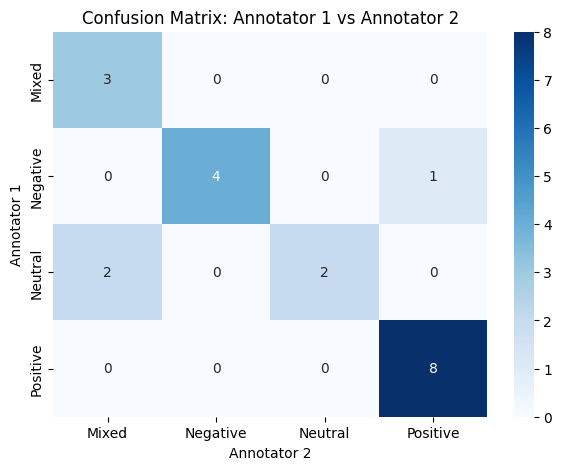

In [ ]:
# TODO: Create a confusion matrix heatmap for Annotator 1 vs Annotator 2
# Hint: Use sklearn's confusion_matrix and seaborn's heatmap

# Your code here
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

unique_labels = sorted(set(annotator1) | set(annotator2))

cm = confusion_matrix(annotator1, annotator2, labels=unique_labels)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=unique_labels,
    yticklabels=unique_labels
)

plt.xlabel("Annotator 2")
plt.ylabel("Annotator 1")
plt.title("Confusion Matrix: Annotator 1 vs Annotator 2")
plt.show()

---

## Part 7: Fleiss' Kappa for Multiple Annotators

### 7.1 Understanding Fleiss' Kappa

When you have more than 2 annotators, use Fleiss' Kappa.

In [ ]:
# Fleiss' Kappa using statsmodels
from statsmodels.stats.inter_rater import fleiss_kappa, aggregate_raters

# Prepare data for Fleiss' Kappa
# Format: (n_items, n_categories) matrix with counts

labels = ['Positive', 'Negative', 'Neutral', 'Mixed']
n_items = len(annotator1)

# Create matrix
data_matrix = []
for i in range(n_items):
    row = [0, 0, 0, 0]  # Counts for each category
    for ann in [annotator1[i], annotator2[i], annotator3[i]]:
        row[labels.index(ann)] += 1
    data_matrix.append(row)

data_matrix = np.array(data_matrix)
print("Data matrix shape:", data_matrix.shape)
print("\nFirst 5 rows (counts per category):")
print(pd.DataFrame(data_matrix[:5], columns=labels))

Data matrix shape: (20, 4)

First 5 rows (counts per category):
   Positive  Negative  Neutral  Mixed
0         2         0        1      0
1         0         0        1      2
2         3         0        0      0
3         0         3        0      0
4         3         0        0      0


### Question 7.1 (Solved): Calculate Fleiss' Kappa

In [ ]:
# SOLVED: Calculate Fleiss' Kappa
fk = fleiss_kappa(data_matrix)
print(f"Fleiss' Kappa (3 annotators): {fk:.4f}")

# Interpret
if fk < 0:
    print("Interpretation: Poor (worse than chance)")
elif fk < 0.20:
    print("Interpretation: Slight agreement")
elif fk < 0.40:
    print("Interpretation: Fair agreement")
elif fk < 0.60:
    print("Interpretation: Moderate agreement")
elif fk < 0.80:
    print("Interpretation: Substantial agreement")
else:
    print("Interpretation: Almost perfect agreement")

Fleiss' Kappa (3 annotators): 0.5135
Interpretation: Moderate agreement


### Question 7.2: How Would You Improve Agreement?

Based on the Fleiss' Kappa score, what actions would you take?

In [ ]:
# TODO: Write 3 specific actions to improve annotator agreement

improvement_actions = """
1. Refine and Expand Annotation Guidelines

2. Conduct Annotator Training and Calibration Sessions

3. Introduce Adjudication and Feedback Loops
"""

---

## Part 8: IoU for Spatial Annotations

### 8.1 Intersection over Union (IoU)

For bounding boxes and segmentation, we use IoU to measure agreement.

In [ ]:
# IoU explanation
print("""
Intersection over Union (IoU):

           Area of Overlap
IoU = ─────────────────────────
         Area of Union

      ┌─────────────┐
      │    ┌────────┼───────┐
      │    │////////│       │
      │    │//Ovrlp/│       │
      └────┼────────┘       │
           │                │
           └────────────────┘

IoU = Overlap / (Box1 + Box2 - Overlap)

Thresholds:
- IoU > 0.5: Match (standard)
- IoU > 0.7: Good match
- IoU > 0.9: Excellent match
""")


Intersection over Union (IoU):

           Area of Overlap
IoU = ─────────────────────────
         Area of Union

      ┌─────────────┐
      │    ┌────────┼───────┐
      │    │////////│       │
      │    │//Ovrlp/│       │
      └────┼────────┘       │
           │                │
           └────────────────┘

IoU = Overlap / (Box1 + Box2 - Overlap)

Thresholds:
- IoU > 0.5: Match (standard)
- IoU > 0.7: Good match
- IoU > 0.9: Excellent match



### Question 8.1 (Solved): Implement IoU Calculation

In [ ]:
# SOLVED: IoU Implementation
def calculate_iou(box1, box2):
    """
    Calculate IoU between two bounding boxes.

    Args:
        box1, box2: Lists of [x1, y1, x2, y2] coordinates

    Returns:
        IoU value (0 to 1)
    """
    # Calculate intersection coordinates
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # Check for no overlap
    if x2 < x1 or y2 < y1:
        return 0.0

    # Calculate areas
    intersection = (x2 - x1) * (y2 - y1)

    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union = area1 + area2 - intersection

    return intersection / union

# Test cases
box1 = [0, 0, 100, 100]  # 100x100 box at origin
box2 = [50, 50, 150, 150]  # 100x100 box shifted by 50
box3 = [200, 200, 300, 300]  # No overlap
box4 = [25, 25, 75, 75]  # Contained within box1

print(f"IoU(box1, box2): {calculate_iou(box1, box2):.4f}")  # Partial overlap
print(f"IoU(box1, box3): {calculate_iou(box1, box3):.4f}")  # No overlap
print(f"IoU(box1, box4): {calculate_iou(box1, box4):.4f}")  # One inside other

IoU(box1, box2): 0.1429
IoU(box1, box3): 0.0000
IoU(box1, box4): 0.2500


### Question 8.2: Calculate IoU for Movie Poster Annotations

Two annotators drew bounding boxes around movie titles on posters. Calculate their IoU.

In [ ]:
# Bounding box annotations from two annotators
poster_annotations = [
    {"poster": "Inception", "ann1": [100, 50, 300, 100], "ann2": [95, 55, 305, 98]},
    {"poster": "The Matrix", "ann1": [50, 100, 250, 180], "ann2": [60, 105, 240, 175]},
    {"poster": "Avatar", "ann1": [120, 80, 280, 150], "ann2": [125, 78, 275, 155]},
    {"poster": "Titanic", "ann1": [80, 60, 320, 120], "ann2": [100, 70, 310, 115]},
]
a = poster_annotations
# TODO: Calculate IoU for each poster and compute the mean IoU

# Your code here
for record in poster_annotations:
  print(f"{record["poster"]}: {calculate_iou(record["ann1"], record["ann2"]):.4f}")

Inception: 0.8245
The Matrix: 0.7875
Avatar: 0.8571
Titanic: 0.6562


### Question 8.3: Visualize Bounding Box Overlap

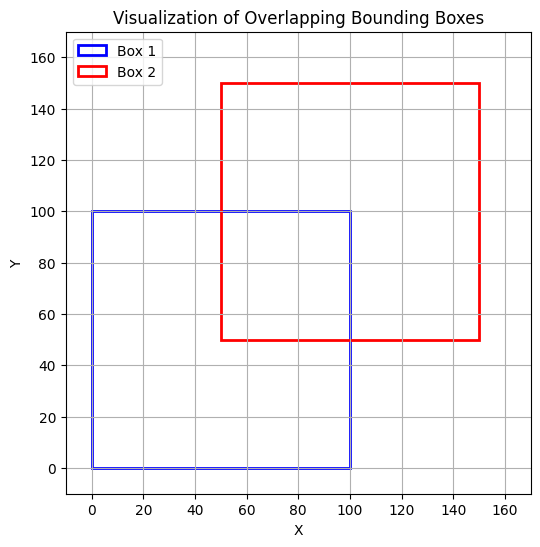

In [ ]:
# TODO: Create a visualization showing two overlapping bounding boxes
# Use matplotlib to draw rectangles
# Hint: matplotlib.patches.Rectangle

# Your code here

import matplotlib.pyplot as plt
import matplotlib.patches as patches

box1 = [0, 0, 100, 100]
box2 = [50, 50, 150, 150]

fig, ax = plt.subplots(figsize=(6, 6))


rect1 = patches.Rectangle(
    (box1[0], box1[1]),
    box1[2] - box1[0],
    box1[3] - box1[1],
    linewidth=2,
    edgecolor='blue',
    facecolor='None',
    label='Box 1'
)

rect2 = patches.Rectangle(
    (box2[0], box2[1]),
    box2[2] - box2[0],
    box2[3] - box2[1],
    linewidth=2,
    edgecolor='red',
    facecolor='None',
    label='Box 2'
)

ax.add_patch(rect1)
ax.add_patch(rect2)

# Set axis limits
ax.set_xlim(-10, 170)
ax.set_ylim(-10, 170)

# Add grid and legend
ax.grid(True)
ax.legend()

ax.set_title("Visualization of Overlapping Bounding Boxes")
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.show()

---

## Part 9: Majority Voting and Adjudication

### 9.1 Resolving Disagreements

In [ ]:
# Majority voting implementation
def majority_vote(annotations):
    """
    Return the most common label from a list of annotations.
    """
    from collections import Counter
    counts = Counter(annotations)
    return counts.most_common(1)[0][0]

# Apply majority voting
final_labels = []
for i in range(len(annotator1)):
    annotations = [annotator1[i], annotator2[i], annotator3[i]]
    final_labels.append(majority_vote(annotations))

annotations_df['majority_vote'] = final_labels
print("Labels with Majority Vote:")
annotations_df[['review_id', 'annotator_1', 'annotator_2', 'annotator_3', 'majority_vote', 'ground_truth']].head(10)

Labels with Majority Vote:


,review_id,annotator_1,annotator_2,annotator_3,majority_vote,ground_truth
0,1,Positive,Positive,Neutral,Positive,Positive
1,2,Neutral,Mixed,Mixed,Mixed,Mixed
2,3,Positive,Positive,Positive,Positive,Positive
3,4,Negative,Negative,Negative,Negative,Negative
4,5,Positive,Positive,Positive,Positive,Positive
5,6,Mixed,Mixed,Mixed,Mixed,Mixed
6,7,Positive,Positive,Neutral,Positive,Positive
7,8,Neutral,Neutral,Neutral,Neutral,Neutral
8,9,Positive,Positive,Positive,Positive,Positive
9,10,Negative,Negative,Mixed,Negative,Negative


### Question 9.1: Identify Disagreements for Expert Review

In [ ]:
# TODO: Identify reviews where all 3 annotators disagree (no majority)
# These should be sent to an expert for adjudication

# Your code here
def majority_vote_adj(annotations):
    """
    Return the most common label from a list of annotations.
    """
    from collections import Counter
    counts = Counter(annotations)
    return counts.most_common(1)[0][1]

# Apply majority voting
final_labels = []
for i in range(len(annotator1)):
    annotations = [annotator1[i], annotator2[i], annotator3[i]]
    x=majority_vote_adj(annotations)
    if(x==1):
      print("Need adjudication")
    else:
      print("Confirm")

Confirm
Confirm
Confirm
Confirm
Confirm
Confirm
Confirm
Confirm
Confirm
Confirm
Confirm
Confirm
Confirm
Confirm
Confirm
Confirm
Confirm
Confirm
Confirm
Need adjudication


### Question 9.2: Implement Weighted Voting

In [ ]:
# TODO: Implement weighted voting where annotator votes are weighted by their accuracy
# Annotator 1 accuracy: 85%, Annotator 2: 80%, Annotator 3: 75%

def weighted_vote(annotations, weights):
    """
    Return the label with highest weighted vote.

    Args:
        annotations: List of labels from each annotator
        weights: List of weights for each annotator

    Returns:
        Label with highest weighted sum
    """
    scores = {}

    for label, weight in zip(annotations, weights):
        scores[label] = scores.get(label, 0) + weight

    return max(scores, key=scores.get)
    # Your code here
    pass

# Test your function
print(weighted_vote(["Pos", "Neut", "Neg"], [0.45, 0.3, 0.9]))

Neg


---

## Part 10: Quality Dashboard

### Question 10.1: Create an Annotator Quality Dashboard

In [ ]:
# TODO: Create a quality dashboard showing:
# 1. Each annotator's accuracy vs ground truth
for i in range(3):
  if(i==0):
    x=annotator1

  elif(i==1):
    x=annotator2

  else:
    x=annotator3

  sum=0

  for p,q in zip(x,ground_truth):
    if(p==q):
      sum+=1

  print(f"Accuracy of annotator{i+1} against ground truth = ", sum/len(x))
# 2. Pairwise kappa scores
from sklearn.metrics import cohen_kappa_score
sklearn_kappa = cohen_kappa_score(annotator1, annotator2)
print(f"Sklearn Cohen's Kappa 1v2: {sklearn_kappa:.4f}")

from sklearn.metrics import cohen_kappa_score
sklearn_kappa = cohen_kappa_score(annotator1, annotator3)
print(f"Sklearn Cohen's Kappa 1v3: {sklearn_kappa:.4f}")

from sklearn.metrics import cohen_kappa_score
sklearn_kappa = cohen_kappa_score(annotator3, annotator2)
print(f"Sklearn Cohen's Kappa 2v3: {sklearn_kappa:.4f}")
# 3. Number of labels per category for each annotator

# Your code here


Accuracy of annotator1 against ground truth =  0.9
Accuracy of annotator2 against ground truth =  0.85
Accuracy of annotator3 against ground truth =  0.65
Sklearn Cohen's Kappa 1v2: 0.7895
Sklearn Cohen's Kappa 1v3: 0.3878
Sklearn Cohen's Kappa 2v3: 0.3793


---

## Challenge Problems

### Challenge 1: Krippendorff's Alpha

Implement Krippendorff's Alpha, which handles missing data and ordinal categories.

In [ ]:
# Challenge: Implement Krippendorff's Alpha
# This metric handles:
# - Any number of annotators
# - Missing data
# - Different types of data (nominal, ordinal, interval, ratio)

# Your code here


### Challenge 2: Annotation Cost Estimator

In [ ]:
# Challenge: Build a function that estimates annotation cost
# Input: number of items, task type, quality level (redundancy)
# Output: estimated cost in USD and time in hours

def estimate_annotation_cost(n_items, task_type, quality_level, domain='general'):
    """
    Estimate the cost and time for an annotation project.

    Args:
        n_items: Number of items to annotate
        task_type: 'text_classification', 'ner', 'bbox', 'segmentation'
        quality_level: 'low' (1 annotator), 'medium' (2), 'high' (3)
        domain: 'general' or 'expert'

    Returns:
        dict with cost_usd, time_hours, annotators_needed
    """
    # Your code here
    pass

# Test with:
# estimate_annotation_cost(10000, 'text_classification', 'high')


### Challenge 3: Label Studio API Integration

Read label studio API documentation here: https://api.labelstud.io/api-reference/introduction/getting-started

In [ ]:
# Challenge: Write functions to interact with Label Studio API
# - Create a project
# - Import tasks
# - Export annotations

# Note: Requires running Label Studio locally
# pip install label-studio
# label-studio start

import requests

class LabelStudioClient:
    def __init__(self, url='http://localhost:8080', api_key=None):
        self.url = url
        self.api_key = api_key
        self.headers = {'Authorization': f'Token {api_key}'}

    def create_project(self, title, config):
        """Create a new annotation project."""
        # Your code here
        pass

    def import_tasks(self, project_id, tasks):
        """Import tasks to a project."""
        # Your code here
        pass

    def export_annotations(self, project_id, tasks, preannotated_from_fields=None):
        """Export annotations from a project."""
        # Your code here
        pass


---

## Summary

In this lab, you learned:

1. **Label Studio Setup**: Creating annotation interfaces with XML configs
2. **Annotation Guidelines**: Writing clear, comprehensive guidelines with edge cases
3. **Percent Agreement**: Simple but limited measure of annotator agreement
4. **Cohen's Kappa**: Agreement metric that accounts for chance (2 annotators)
5. **Fleiss' Kappa**: Extension for multiple annotators
6. **IoU**: Measuring agreement for spatial annotations
7. **Majority Voting**: Resolving disagreements between annotators

### Key Takeaways

- **Kappa >= 0.8** is the target for production annotation tasks
- Clear guidelines with examples reduce disagreements
- Multiple annotators + adjudication = higher quality labels
- Different metrics for different annotation types

### Next Week

Week 4: Optimizing Labeling with Active Learning, Weak Supervision, and LLMs!